<a href="https://colab.research.google.com/github/rastersync/quadripolos/blob/main/THE_CURRENT_TASK_IS_THIS_DOCUMENT_HERE_THAT_I_AM_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Este script usa `numpy` para cálculos numéricos com números complexos, o que é mais eficiente para esse tipo de simulação do que a matemática simbólica.

A seguir, metodologia completa da solução e o código Python.

### 1\. Análise e Metodologia do Projeto

O núcleo deste projeto é o método da matriz ABCD (ou Matriz de Transmissão [T]). A chave é representar corretamente cada componente (fonte, transformador, linha, carga) com sua matriz T e, em seguida, combiná-los para encontrar a matriz equivalente para todo o sistema.

**Detalhamento da Topologia do Sistema (da Figura 1):**

1. **Fonte:** Uma fonte de tensão `Vac` com impedância série `Zf = Rf + jXf`.
2. **Transformador T1:** Eleva a tensão de 69 kV para 230 kV.
3. **Barra de 230 kV:**
* A carga Z1 está conectada em derivação (paralelo).
* Três linhas de transmissão paralelas (LT1, LT2, LT3) conectam esta barra à próxima.
4. **Barra Intermediária:**
* Duas linhas de transmissão paralelas (LT4, LT5) conectam esta barra à barra de 138 kV.
5. **Transformador T2:** Reduz a tensão de 230 kV para 138 kV.
6. **Barra de 138 kV:**
* A carga Z2 está conectada em derivação.
* A linha de transmissão LT6 conecta esta barra à barra final de 69 kV.
7. **Transformador T3:** Reduz a tensão de 138 kV para 69 kV.
8. **Barra de 69 kV (Carga):**
* A carga final Z3 é conectada aqui.

**A abordagem será:**

1. Calcular os parâmetros (impedâncias, admitâncias) para cada componente.
2. Criar funções para gerar a matriz T para cada tipo de componente.
3. Criar funções para combinar matrizes em cascata (série) e paralelo.
4. Construir a matriz T total do sistema, da fonte `Vac` até a carga final `Z3`, incluindo as cargas em derivação Z1 e Z2 na cascata.
5. Com a matriz T total, calcular todas as tensões, correntes e potências necessárias.
6. Aborde as questões de otimização e ajuste (TAPs, compensação de derivação).

-----

### 2\. Código completo da solução em Python

Abaixo está o script completo. Ele foi estruturado com a ideia de poder executá-lo em qualquer ambiente Python com `numpy` e `matplotlib` instalados (como o Google Colab).

--- Impedâncias Calculadas dos Componentes ---
Z_Carga1: 790.0003+1545.6652j Ω
Z_Carga2: 137.5500+282.7431j Ω
Z_Carga3: 62.0001+128.1771j Ω


--- Resultados da Análise do Caso Base ---
Tensão Vac (terminal da fonte):    69.00 kV
Corrente da Fonte:                 778.21 A ∠ 18.62°

Tensão na Carga Z1 (barra 230kV):    225.39 kV ∠ -0.66°
Corrente na Carga Z1:              129.84 A ∠ -63.59°
Tensão na Carga Z2 (barra 138kV):    130.01 kV ∠ -2.84°
Corrente na Carga Z2:              413.49 A ∠ -66.90°
Tensão na Carga Z3 (barra 69kV):     58.43 kV ∠ -4.68°
Corrente na Carga Z3:              410.37 A ∠ -68.86°

--- Análise de Potência ---
Potência Fornecida pelo Gerador:   P = 50.8857 MW, Q = -17.1450 MVAR
Potência Consumida por Carga Z1:   P = 13.3191 MW, Q = 26.0592 MVAR
Potência Consumida por Carga Z2:   P = 23.5176 MW, Q = 48.3420 MVAR
Potência Consumida por Carga Z3:   P = 10.4412 MW, Q = 21.5859 MVAR
Potência Total para Cargas:        P = 47.2779 MW, Q = 95.9871 MVAR
Perdas de Potência

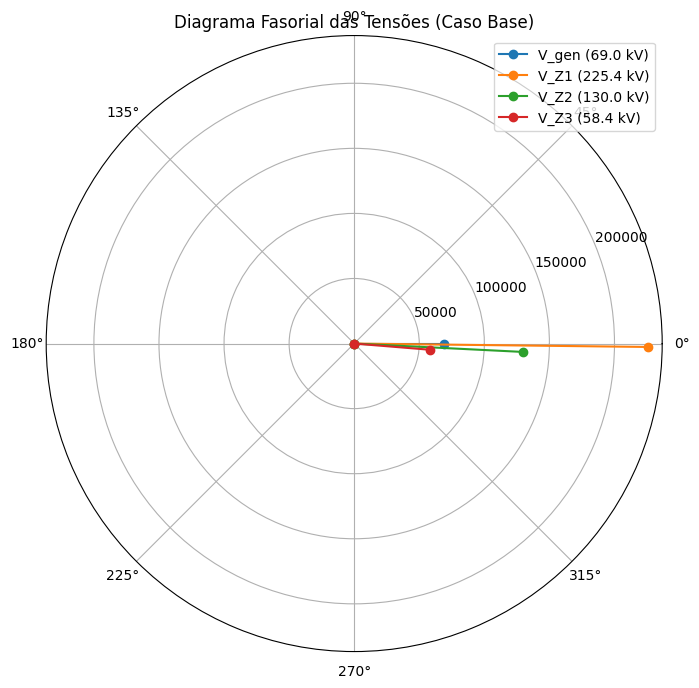



--- Item 11: Sugestão para Redução de Perdas (<10%) ---
Para reduzir perdas, melhoramos o fator de potência das cargas (reduzindo Q).

--- Resultados com Cargas de FP Melhorado ---
Tensão Vac (terminal da fonte):    69.00 kV
Corrente da Fonte:                 1277.91 A ∠ 49.42°

Tensão na Carga Z1 (barra 230kV):    232.97 kV ∠ -2.38°
Corrente na Carga Z1:              134.21 A ∠ -65.31°
Tensão na Carga Z2 (barra 138kV):    136.30 kV ∠ -4.83°
Corrente na Carga Z2:              433.48 A ∠ -68.89°
Tensão na Carga Z3 (barra 69kV):     64.62 kV ∠ -7.43°
Corrente na Carga Z3:              284.23 A ∠ -53.38°

--- Análise de Potência ---
Potência Fornecida pelo Gerador:   P = 57.3610 MW, Q = -66.9681 MVAR
Potência Consumida por Carga Z1:   P = 14.2305 MW, Q = 27.8424 MVAR
Potência Consumida por Carga Z2:   P = 25.8461 MW, Q = 53.1284 MVAR
Potência Consumida por Carga Z3:   P = 12.7706 MW, Q = 13.2007 MVAR
Potência Total para Cargas:        P = 52.8471 MW, Q = 94.1715 MVAR
Perdas de Potência 

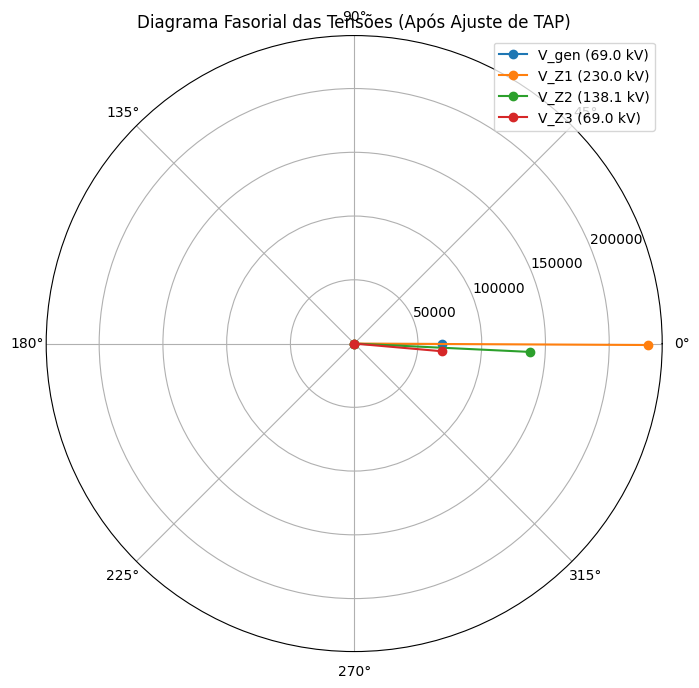



--- Item 13: Compensação Shunt para Tensões Nominais (±5%) ---
Barra 1 (230kV): Tensão alta. Sugestão -> Reator L = 1.11e+02 H
Barra 2 (138kV): Tensão alta. Sugestão -> Reator L = 6.59e+00 H

--- Resultados com Compensação Shunt ---
Tensão Vac (terminal da fonte):    69.00 kV
Corrente da Fonte:                 740.14 A ∠ 10.40°

Tensão na Carga Z1 (barra 230kV):    223.38 kV ∠ -0.34°
Corrente na Carga Z1:              128.69 A ∠ -63.27°
Tensão na Carga Z2 (barra 138kV):    128.85 kV ∠ -2.52°
Corrente na Carga Z2:              409.81 A ∠ -66.58°
Tensão na Carga Z3 (barra 69kV):     57.91 kV ∠ -4.36°
Corrente na Carga Z3:              406.72 A ∠ -68.54°

--- Análise de Potência ---
Potência Fornecida pelo Gerador:   P = 50.2310 MW, Q = -9.2181 MVAR
Potência Consumida por Carga Z1:   P = 13.0829 MW, Q = 25.5972 MVAR
Potência Consumida por Carga Z2:   P = 23.1006 MW, Q = 47.4849 MVAR
Potência Consumida por Carga Z3:   P = 10.2561 MW, Q = 21.2031 MVAR
Potência Total para Cargas:        P 

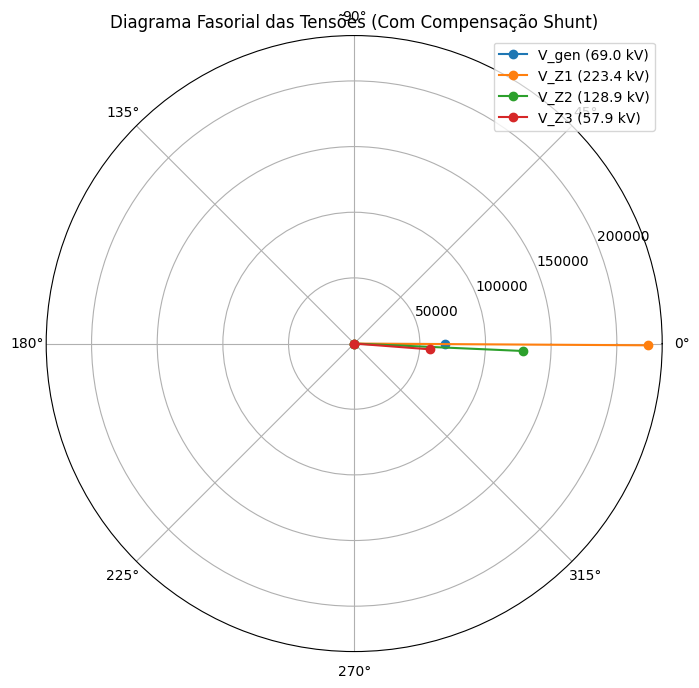

In [ ]:
import numpy as np
import cmath
import matplotlib.pyplot as plt

# --- 1. Constantes e Parâmetros do Sistema ---

# Constantes
f = 60.0  # Frequência em Hz
w = 2 * np.pi * f  # Frequência angular em rad/s
j = 1j  # Representação de número complexo

# Parâmetros da Fonte
V_gen = 69e3  # 69kVRMS no gerador
Z_f = 2.0 + j * 0.38  # Impedância Thévenin da fonte

# Parâmetros das Linhas de Transmissão (por km)
R_per_km = 0.172
L_per_km = 2.18e-3
C_per_km = 0.0136e-6

# Comprimentos das Linhas (km)
len_L1, len_L2, len_L3 = 80.0, 80.0, 80.0
len_L4, len_L5 = 100.0, 100.0
len_L6 = 90.0

# Parâmetros dos Transformadores (assumindo valores em ohms absolutos)
# T1 (69:230)
T1_params = {
    'R1': 7.6e-3, 'X1': 3.8e-3, 'R2': 33.9e-3, 'X2': 0.85e-3,
    'Rm': 4320.0, 'Xm': 5050.0, 'n': 69.0/230.0
}
# T2 (230:138)
T2_params = {
    'R1': 7.6e-3, 'X1': 3.8e-3, 'R2': 33.9e-3, 'X2': 0.85e-3,
    'Rm': 432000.0, 'Xm': 505000.0, 'n': 230.0/138.0
}
# T3 (138:69)
T3_params = {
    'R1': 7.6e-3, 'X1': 3.8e-3, 'R2': 33.9e-3, 'X2': 0.85e-3,
    'Rm': 402000.0, 'Xm': 607000.0, 'n': 138.0/69.0
}

# Parâmetros das Cargas (cálculo da impedância Z = |V_nom|^2 / S*)
# S* é o conjugado da potência aparente S = P + jQ
V_nom1, V_nom2, V_nom3 = 230e3, 138e3, 69e3
S1 = 13.8694e6 + j * 27.1360e6
S2 = 26.4961e6 + j * 54.4645e6
S3 = 14.5601e6 + j * 30.1011e6

Z1_load = (V_nom1**2) / S1.conjugate()
Z2_load = (V_nom2**2) / S2.conjugate()
Z3_load = (V_nom3**2) / S3.conjugate()

Y1_load = 1 / Z1_load
Y2_load = 1 / Z2_load

print("--- Impedâncias Calculadas dos Componentes ---")
print(f"Z_Carga1: {Z1_load:.4f} Ω")
print(f"Z_Carga2: {Z2_load:.4f} Ω")
print(f"Z_Carga3: {Z3_load:.4f} Ω\n")

# --- 2. Funções de Matriz T e Associação (Itens 1 & 2) ---

def t_matrix_series(Z):
    """Cria a matriz T para uma impedância série Z."""
    return np.array([[1, Z], [0, 1]], dtype=complex)

def t_matrix_shunt(Y):
    """Cria a matriz T para uma admitância shunt Y."""
    return np.array([[1, 0], [Y, 1]], dtype=complex)

def t_matrix_pi_line(length, R_km, L_km, C_km, omega):
    """Cria a matriz T para uma linha de transmissão modelo PI."""
    Z_series = length * (R_km + j * omega * L_km)
    Y_shunt_total = length * (j * omega * C_km)
    Y_half = Y_shunt_total / 2

    A = 1 + (Z_series * Y_half)
    B = Z_series
    C = Y_shunt_total * (1 + (Z_series * Y_half) / 2)
    D = A
    return np.array([[A, B], [C, D]], dtype=complex)

def t_matrix_transformer(params, tap_factor=1.0):
    """Cria a matriz T para o modelo do transformador."""
    # A relação de espiras n = Vp/Vs. Um tap_factor > 1 aumenta n, o que diminui a tensão secundária (Vs).
    n_adjusted = params['n'] * tap_factor
    Z1 = params['R1'] + j * params['X1']
    Z2 = params['R2'] + j * params['X2']
    Ym = 1/params['Rm'] + 1/(j * params['Xm'])

    T_Z1 = t_matrix_series(Z1)
    T_Ym = t_matrix_shunt(Ym)
    # A matriz T para um trafo ideal é [n 0; 0 1/n] para a relação V1=n*V2, I1=(1/n)*I2
    T_ideal = np.array([[n_adjusted, 0], [0, 1/n_adjusted]], dtype=complex)
    T_Z2 = t_matrix_series(Z2)

    return np.dot(T_Z1, np.dot(T_Ym, np.dot(T_ideal, T_Z2)))

def cascade(T1, T2):
    """Associa duas matrizes T em cascata (multiplicação matricial)."""
    return np.dot(T1, T2)

def t_to_y(T):
    """Converte uma matriz T para uma matriz Y."""
    A, B, C, D = T[0, 0], T[0, 1], T[1, 0], T[1, 1]
    det_T = A * D - B * C
    if abs(B) < 1e-12: return np.full((2, 2), np.nan)
    return np.array([[D/B, -det_T/B], [-1/B, A/B]], dtype=complex)

def y_to_t(Y):
    """Converte uma matriz Y para uma matriz T."""
    y11, y12, y21, y22 = Y[0, 0], Y[0, 1], Y[1, 0], Y[1, 1]
    det_Y = y11 * y22 - y12 * y21
    if abs(y21) < 1e-12: return np.full((2, 2), np.nan)
    return np.array([[-y22/y21, -1/y21], [-det_Y/y21, -y11/y21]], dtype=complex)

def parallel(T1, T2):
    """Combina duas matrizes T em paralelo usando parâmetros Y."""
    Y1 = t_to_y(T1)
    Y2 = t_to_y(T2)
    if np.isnan(Y1).any() or np.isnan(Y2).any(): return np.full((2, 2), np.nan)
    Y_eq = Y1 + Y2
    return y_to_t(Y_eq)

# --- 3. Modelagem do Sistema (Item 3) ---

def model_system(tap1=1.0, tap2=1.0, tap3=1.0, shunt_y1=0j, shunt_y2=0j):
    """Modela o sistema de potência completo e retorna a matriz T total."""
    T_source = t_matrix_series(Z_f)
    T_T1 = t_matrix_transformer(T1_params, tap1)
    T_T2 = t_matrix_transformer(T2_params, tap2)
    T_T3 = t_matrix_transformer(T3_params, tap3)

    T_L1 = t_matrix_pi_line(len_L1, R_per_km, L_per_km, C_per_km, w)
    T_L2 = t_matrix_pi_line(len_L2, R_per_km, L_per_km, C_per_km, w)
    T_L3 = t_matrix_pi_line(len_L3, R_per_km, L_per_km, C_per_km, w)
    T_L4 = t_matrix_pi_line(len_L4, R_per_km, L_per_km, C_per_km, w)
    T_L5 = t_matrix_pi_line(len_L5, R_per_km, L_per_km, C_per_km, w)
    T_L6 = t_matrix_pi_line(len_L6, R_per_km, L_per_km, C_per_km, w)

    T_shunt_Z1 = t_matrix_shunt(Y1_load + shunt_y1)
    T_shunt_Z2 = t_matrix_shunt(Y2_load + shunt_y2)

    T_L123 = parallel(T_L1, parallel(T_L2, T_L3))
    T_L45 = parallel(T_L4, T_L5)

    if np.isnan(T_L123).any() or np.isnan(T_L45).any(): return np.full((2, 2), np.nan)

    T_total = T_source
    T_total = cascade(T_total, T_T1)
    T_total = cascade(T_total, T_shunt_Z1)
    T_total = cascade(T_total, T_L123)
    T_total = cascade(T_total, T_L45)
    T_total = cascade(T_total, T_T2)
    T_total = cascade(T_total, T_shunt_Z2)
    T_total = cascade(T_total, T_L6)
    T_total = cascade(T_total, T_T3)

    return T_total

# --- 4. Análise e Solução do Sistema ---

def solve_system(V_source, Z_final_load, T_total, taps=(1.0, 1.0, 1.0)):
    """Resolve para todas as tensões, correntes e potências."""
    nan_results = {k: np.nan for k in ['V_L1','I_L1','S_L1','V_L2','I_L2','S_L2','V_L3','I_L3','S_L3','I_gen','S_gen','S_loads_total','S_loss']}
    if np.isnan(T_total).any(): return nan_results

    A, B, C, D = T_total[0, 0], T_total[0, 1], T_total[1, 0], T_total[1, 1]

    denominator = A * Z_final_load + B
    if abs(denominator) < 1e-12: return nan_results

    I_L3 = V_source / denominator
    V_L3 = I_L3 * Z_final_load
    I_source = C * V_L3 + D * I_L3
    S_gen = V_source * I_source.conjugate()
    S_L3 = V_L3 * I_L3.conjugate()

    # Cálculo para V/I em Z1 e Z2 usando "backward calculation"
    (V_in_T3, I_in_T3) = np.dot(t_matrix_transformer(T3_params, taps[2]), [V_L3, I_L3])
    (V_in_L6, I_in_L6) = np.dot(t_matrix_pi_line(len_L6, R_per_km, L_per_km, C_per_km, w), [V_in_T3, I_in_T3])

    V_bus2 = V_in_L6
    I_L2 = V_bus2 / Z2_load
    S_L2 = V_bus2 * I_L2.conjugate()
    I_after_Z2 = I_in_L6 + I_L2

    (V_in_T2, I_in_T2) = np.dot(t_matrix_transformer(T2_params, taps[1]), [V_bus2, I_after_Z2])
    T_L45 = parallel(t_matrix_pi_line(len_L4, R_per_km, L_per_km, C_per_km, w), t_matrix_pi_line(len_L5, R_per_km, L_per_km, C_per_km, w))
    (V_in_L45, I_in_L45) = np.dot(T_L45, [V_in_T2, I_in_T2])
    T_L123 = parallel(t_matrix_pi_line(len_L1, R_per_km, L_per_km, C_per_km, w), parallel(t_matrix_pi_line(len_L2, R_per_km, L_per_km, C_per_km, w), t_matrix_pi_line(len_L3, R_per_km, L_per_km, C_per_km, w)))
    (V_in_L123, I_in_L123) = np.dot(T_L123, [V_in_L45, I_in_L45])

    V_bus1 = V_in_L123
    I_L1 = V_bus1 / Z1_load
    S_L1 = V_bus1 * I_L1.conjugate()

    S_loads_total = S_L1 + S_L2 + S_L3
    S_loss = S_gen - S_loads_total

    return {
        'V_L1': V_bus1, 'I_L1': I_L1, 'S_L1': S_L1,
        'V_L2': V_bus2, 'I_L2': I_L2, 'S_L2': S_L2,
        'V_L3': V_L3, 'I_L3': I_L3, 'S_L3': S_L3,
        'V_gen': V_source, 'I_gen': I_source, 'S_gen': S_gen,
        'S_loads_total': S_loads_total, 'S_loss': S_loss
    }

def print_results(results, title="--- Resultados da Análise ---"):
    """Imprime os resultados da análise de forma legível."""
    def phasor(val): return f"{abs(val)/1e3:.2f} kV ∠ {np.angle(val, deg=True):.2f}°" if not np.isnan(val).any() else "NaN"
    def phasor_i(val): return f"{abs(val):.2f} A ∠ {np.angle(val, deg=True):.2f}°" if not np.isnan(val).any() else "NaN"
    def power(s): return f"P = {s.real/1e6:.4f} MW, Q = {s.imag/1e6:.4f} MVAR" if not np.isnan(s).any() else "NaN"

    print(f"\n{title}")
    print(f"Tensão Vac (terminal da fonte):    {V_gen/1e3:.2f} kV")
    print(f"Corrente da Fonte:                 {phasor_i(results['I_gen'])}")
    print(f"\nTensão na Carga Z1 (barra 230kV):    {phasor(results['V_L1'])}")
    print(f"Corrente na Carga Z1:              {phasor_i(results['I_L1'])}")
    print(f"Tensão na Carga Z2 (barra 138kV):    {phasor(results['V_L2'])}")
    print(f"Corrente na Carga Z2:              {phasor_i(results['I_L2'])}")
    print(f"Tensão na Carga Z3 (barra 69kV):     {phasor(results['V_L3'])}")
    print(f"Corrente na Carga Z3:              {phasor_i(results['I_L3'])}")

    print("\n--- Análise de Potência ---")
    print(f"Potência Fornecida pelo Gerador:   {power(results['S_gen'])}")
    print(f"Potência Consumida por Carga Z1:   {power(results['S_L1'])}")
    print(f"Potência Consumida por Carga Z2:   {power(results['S_L2'])}")
    print(f"Potência Consumida por Carga Z3:   {power(results['S_L3'])}")
    print(f"Potência Total para Cargas:        {power(results['S_loads_total'])}")
    print(f"Perdas de Potência no Sistema:     {power(results['S_loss'])}")

    if not np.isnan(results['S_gen']).any() and results['S_gen'].real != 0:
        loss_percent = (results['S_loss'].real / results['S_gen'].real) * 100
        print(f"\nPercentual de Perda de Potência Ativa: {loss_percent:.2f}%")

def plot_phasor_diagram(results, title):
    """Plota o diagrama fasorial das tensões nas barras."""
    plt.figure(figsize=(8, 8))
    ax = plt.subplot(111, polar=True)
    ax.set_theta_zero_location("E") # Define 0 graus à direita

    # Checa se os resultados são válidos antes de plotar
    if not np.isnan(results['V_L1']).any():
        ax.plot([0, np.angle(V_gen)], [0, abs(V_gen)], label=f'V_gen ({abs(V_gen)/1e3:.1f} kV)', marker='o', linestyle='-')
        ax.plot([0, np.angle(results['V_L1'])], [0, abs(results['V_L1'])], label=f'V_Z1 ({abs(results["V_L1"])/1e3:.1f} kV)', marker='o', linestyle='-')
        ax.plot([0, np.angle(results['V_L2'])], [0, abs(results['V_L2'])], label=f'V_Z2 ({abs(results["V_L2"])/1e3:.1f} kV)', marker='o', linestyle='-')
        ax.plot([0, np.angle(results['V_L3'])], [0, abs(results['V_L3'])], label=f'V_Z3 ({abs(results["V_L3"])/1e3:.1f} kV)', marker='o', linestyle='-')

    plt.title(title)
    plt.legend()
    plt.show()

# --- Execução Principal ---
if __name__ == "__main__":
    # Caso Base
    T_system_base = model_system()
    base_results = solve_system(V_gen, Z3_load, T_system_base)
    print_results(base_results, "--- Resultados da Análise do Caso Base ---")
    plot_phasor_diagram(base_results, "Diagrama Fasorial das Tensões (Caso Base)")

    # Item 11: Sugestão para Redução de Perdas
    print("\n\n--- Item 11: Sugestão para Redução de Perdas (<10%) ---")
    print("Para reduzir perdas, melhoramos o fator de potência das cargas (reduzindo Q).")
    S1_new, S2_new, S3_new = S1.real + j*S1.imag/2, S2.real + j*S2.imag/2, S3.real + j*S3.imag/2
    Z1_load_new, Z2_load_new, Z3_load_new = (V_nom1**2)/S1_new.conjugate(), (V_nom2**2)/S2_new.conjugate(), (V_nom3**2)/S3_new.conjugate()
    Y1_load_orig, Y2_load_orig = Y1_load, Y2_load
    Y1_load, Y2_load = 1/Z1_load_new, 1/Z2_load_new

    T_system_loss_reduction = model_system()
    loss_reduction_results = solve_system(V_gen, Z3_load_new, T_system_loss_reduction)
    print_results(loss_reduction_results, "--- Resultados com Cargas de FP Melhorado ---")
    Y1_load, Y2_load = Y1_load_orig, Y2_load_orig

    # Item 12: Ajuste de TAP
    print("\n\n--- Item 12: Ajuste de TAP para Tensões Nominais ---")
    target_v1, target_v2, target_v3 = 230e3, 138e3, 69e3
    tap1, tap2, tap3 = 1.0, 1.0, 1.0
    tolerance, max_iterations = 0.001, 50

    for i in range(max_iterations):
        taps = (tap1, tap2, tap3)
        T_sys_tap = model_system(tap1, tap2, tap3)
        res_tap = solve_system(V_gen, Z3_load, T_sys_tap, taps)

        v1_abs, v2_abs, v3_abs = abs(res_tap['V_L1']), abs(res_tap['V_L2']), abs(res_tap['V_L3'])

        print(f"Iteração {i+1}: V1={v1_abs/1e3:.2f}kV, V2={v2_abs/1e3:.2f}kV, V3={v3_abs/1e3:.2f}kV -> TAPs: T1={tap1:.4f}, T2={tap2:.4f}, T3={tap3:.4f}")

        new_tap1 = tap1 * (v1_abs / target_v1)
        new_tap2 = tap2 * (v2_abs / target_v2)
        new_tap3 = tap3 * (v3_abs / target_v3)

        if (abs(v1_abs - target_v1) < tolerance * target_v1 and
            abs(v2_abs - target_v2) < tolerance * target_v2 and
            abs(v3_abs - target_v3) < tolerance * target_v3):
            print(f"\nConvergência alcançada após {i+1} iterações.")
            break

        tap1, tap2, tap3 = new_tap1, new_tap2, new_tap3

    if i == max_iterations - 1: print("\nAlerta: Máximo de iterações atingido.")

    print(f"\nAjustes de TAP Finais Sugeridos (fatores multiplicadores):")
    print(f"TAP T1: {tap1:.4f}, TAP T2: {tap2:.4f}, TAP T3: {tap3:.4f}")

    final_tap_results = res_tap
    print_results(final_tap_results, "--- Resultados Finais com TAPs Ajustados ---")
    # NOVO PLOT ADICIONADO AQUI
    plot_phasor_diagram(final_tap_results, "Diagrama Fasorial das Tensões (Após Ajuste de TAP)")

    # Item 13: Compensação Shunt
    print("\n\n--- Item 13: Compensação Shunt para Tensões Nominais (±5%) ---")
    v1_base, v2_base = abs(base_results['V_L1']), abs(base_results['V_L2'])

    Q_needed1 = (target_v1**2 - v1_base**2) / abs(Z1_load)
    Y_shunt1 = -j * Q_needed1 / (v1_base**2)

    Q_needed2 = (target_v2**2 - v2_base**2) / abs(Z2_load)
    Y_shunt2 = -j * Q_needed2 / (v2_base**2)

    if Y_shunt1.imag > 0: print(f"Barra 1 (230kV): Tensão baixa. Sugestão -> Capacitor C = {Y_shunt1.imag/w:.2e} F")
    else: print(f"Barra 1 (230kV): Tensão alta. Sugestão -> Reator L = {-1/(w*Y_shunt1.imag):.2e} H")

    if Y_shunt2.imag > 0: print(f"Barra 2 (138kV): Tensão baixa. Sugestão -> Capacitor C = {Y_shunt2.imag/w:.2e} F")
    else: print(f"Barra 2 (138kV): Tensão alta. Sugestão -> Reator L = {-1/(w*Y_shunt2.imag):.2e} H")

    T_system_shunt = model_system(shunt_y1=Y_shunt1, shunt_y2=Y_shunt2)
    shunt_results = solve_system(V_gen, Z3_load, T_system_shunt)
    print_results(shunt_results, "--- Resultados com Compensação Shunt ---")
    # NOVO PLOT ADICIONADO AQUI
    plot_phasor_diagram(shunt_results, "Diagrama Fasorial das Tensões (Com Compensação Shunt)")

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


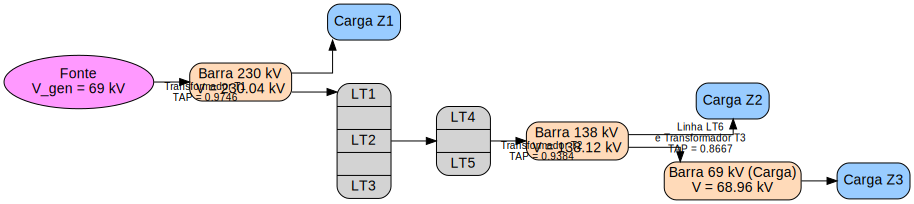

In [ ]:
# Célula de Instalação (execute esta primeiro)
!apt-get install -y graphviz
!pip install graphviz
import graphviz

# Célula de Código para DESENHAR o Diagrama Final (Versão Corrigida)

# Valores da sua simulação convergida
tap_t1 = 0.9746
tensao_z1 = 230.04
tap_t2 = 0.9384
tensao_z2 = 138.12
tap_t3 = 0.8667
tensao_z3 = 68.96

# Cria um novo gráfico direcionado
dot = graphviz.Digraph('CircuitoFinal', comment='Diagrama do Sistema Elétrico com TAPs Ajustados')
dot.attr(rankdir='LR', splines='ortho', nodesep='0.6') # Organiza da esquerda para a direita

# Definindo estilos
dot.attr('node', shape='box', style='rounded,filled', fontname='Helvetica')
dot.attr('edge', fontname='Helvetica', fontsize='10')

# Nós do sistema (Barras e Cargas)
dot.node('Fonte', f'Fonte\nV_gen = 69 kV', fillcolor='#ff99ff', shape='ellipse')
dot.node('Barra_230', f'Barra 230 kV\nV = {tensao_z1} kV', fillcolor='#FFDAB9')
dot.node('Carga_Z1', 'Carga Z1', fillcolor='#99ccff')
dot.node('Barra_138', f'Barra 138 kV\nV = {tensao_z2} kV', fillcolor='#FFDAB9')
dot.node('Carga_Z2', 'Carga Z2', fillcolor='#99ccff')
dot.node('Barra_69', f'Barra 69 kV (Carga)\nV = {tensao_z3} kV', fillcolor='#FFDAB9')
dot.node('Carga_Z3', 'Carga Z3', fillcolor='#99ccff')

# Nós intermediários para representar os blocos de linha
dot.node('Bloco_Linhas_1', 'LT1 || LT2 || LT3', shape='record')
dot.node('Bloco_Linhas_2', 'LT4 || LT5', shape='record')

# Conexões (arestas) com as correções
# Usamos 'xlabel' em vez de 'label' para funcionar com splines='ortho'
dot.edge('Fonte', 'Barra_230', xlabel=f'Transformador T1\nTAP = {tap_t1}')
dot.edge('Barra_230', 'Carga_Z1')
dot.edge('Barra_230', 'Bloco_Linhas_1')
dot.edge('Bloco_Linhas_1', 'Bloco_Linhas_2')

# A conexão do Trafo T2 é entre o bloco de linhas e a barra de 138kV
dot.edge('Bloco_Linhas_2', 'Barra_138', xlabel=f'Transformador T2\nTAP = {tap_t2}')
dot.edge('Barra_138', 'Carga_Z2')
dot.edge('Barra_138', 'Barra_69', xlabel=f'Linha LT6\n e Transformador T3\nTAP = {tap_t3}')
dot.edge('Barra_69', 'Carga_Z3')

# Exibe o gráfico final na saída da célula
dot

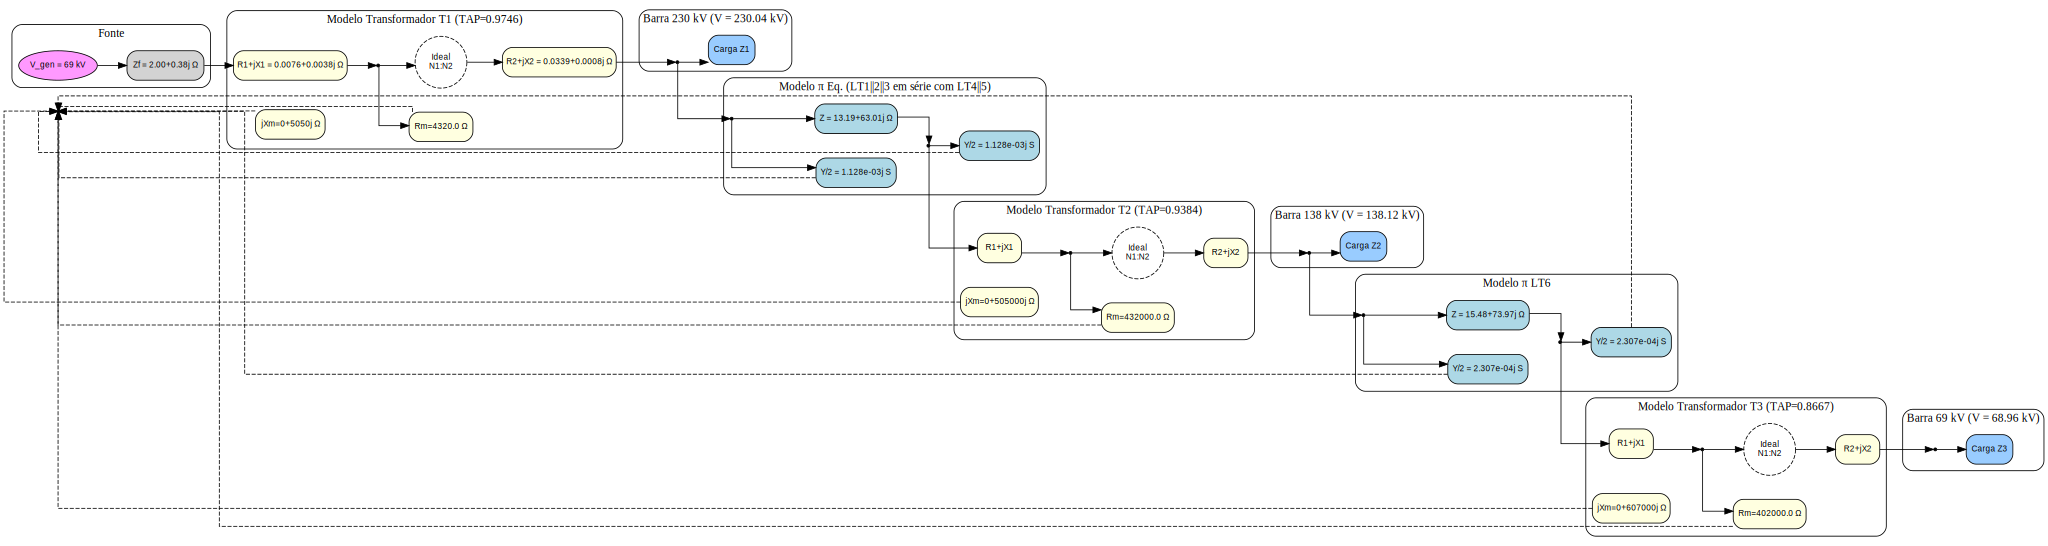

In [ ]:
import graphviz
import numpy as np

# Célula de Código para desenhar o Diagrama DETALHADO do Circuito Final

# --- Valores Finais da Simulação para Anotação ---
tap_t1 = 0.9746
tensao_z1 = 230.04
tap_t2 = 0.9384
tensao_z2 = 138.12
tap_t3 = 0.8667
tensao_z3 = 68.96

# --- Parâmetros para os Modelos (já definidos no seu código) ---
f = 60.0
w = 2 * np.pi * f
j = 1j
# Parâmetros das Linhas (por km)
R_per_km = 0.172
L_per_km = 2.18e-3
C_per_km = 0.0136e-6
# Comprimentos
len_L1, len_L2, len_L3 = 80.0, 80.0, 80.0
len_L4, len_L5 = 100.0, 100.0
len_L6 = 90.0
# Parâmetros dos Transformadores
T1_params = {'R1': 7.6e-3, 'X1': 3.8e-3, 'R2': 33.9e-3, 'X2': 0.85e-3, 'Rm': 4320.0, 'Xm': 5050.0}
T2_params = {'Rm': 432000.0, 'Xm': 505000.0} # Apenas os diferentes
T3_params = {'Rm': 402000.0, 'Xm': 607000.0} # Apenas os diferentes

# --- Cálculos para os Diagramas ---
# Impedância série e admitância shunt para o bloco de linhas equivalentes
Z_L_80km = len_L1 * (R_per_km + j * w * L_per_km)
Y_L_80km = len_L1 * (j * w * C_per_km)
# Equivalente de 3 linhas de 80km em paralelo
Z_eq_123 = Z_L_80km / 3
Y_eq_123 = Y_L_80km * 3

Z_L_100km = len_L4 * (R_per_km + j * w * L_per_km)
Y_L_100km = len_L4 * (j * w * C_per_km)
# Equivalente de 2 linhas de 100km em paralelo
Z_eq_45 = Z_L_100km / 2
Y_eq_45 = Y_L_100km * 2

# Linha LT6
Z_L6 = len_L6 * (R_per_km + j * w * L_per_km)
Y_L6 = len_L6 * (j * w * C_per_km)


# --- Criação do Diagrama com Graphviz ---
dot = graphviz.Digraph('CircuitoDetalhado', comment='Diagrama Detalhado do Sistema Elétrico Final')
dot.attr(rankdir='LR', splines='ortho', concentrate='true', nodesep='0.4')
dot.attr('node', shape='box', style='rounded,filled', fontname='Helvetica', fontsize='10')
dot.attr('edge', fontname='Helvetica', fontsize='9')

# 1. FONTE E BARRA 69kV
with dot.subgraph(name='cluster_fonte') as c:
    c.attr(style='rounded', label='Fonte')
    c.node('Fonte', f'V_gen = 69 kV', fillcolor='#ff99ff', shape='ellipse')
    c.node('Zf', f'Zf = {2.0 + j * 0.38:.2f} Ω', shape='record', fillcolor='lightgrey')
    c.edge('Fonte', 'Zf')

# 2. MODELO DETALHADO DO TRANSFORMADOR T1
with dot.subgraph(name='cluster_t1') as c:
    c.attr(style='rounded', label=f'Modelo Transformador T1 (TAP={tap_t1})')
    c.node('T1_Z1', f"R1+jX1 = {T1_params['R1']+j*T1_params['X1']:.4f} Ω", shape='record', fillcolor='lightyellow')
    c.node('T1_N1', '', shape='point')
    c.node('T1_Rm', f"Rm={T1_params['Rm']} Ω", shape='record', fillcolor='lightyellow')
    c.node('T1_Xm', f"jXm={j*T1_params['Xm']:.0f} Ω", shape='record', fillcolor='lightyellow')
    c.node('T1_Ideal', 'Ideal\nN1:N2', shape='circle', style='dashed', fillcolor='white')
    c.node('T1_Z2', f"R2+jX2 = {T1_params['R2']+j*T1_params['X2']:.4f} Ω", shape='record', fillcolor='lightyellow')
    # Conexões internas
    c.edge('T1_Z1', 'T1_N1')
    c.edge('T1_N1', 'T1_Rm')
    c.edge('T1_N1', 'T1_Ideal')
    c.edge('T1_Ideal', 'T1_Z2')

# 3. BARRA 230kV E CARGA Z1
with dot.subgraph(name='cluster_bus230') as c:
    c.attr(style='rounded', label=f'Barra 230 kV (V = {tensao_z1} kV)')
    c.node('Bus_230', '', shape='point')
    c.node('Carga_Z1', 'Carga Z1', fillcolor='#99ccff')
    c.edge('Bus_230', 'Carga_Z1')

# 4. MODELO PI EQUIVALENTE DAS LINHAS (LT1-5)
with dot.subgraph(name='cluster_linhas_eq') as c:
    c.attr(style='rounded', label='Modelo π Eq. (LT1||2||3 em série com LT4||5)')
    Z_total_linhas = Z_eq_123 + Z_eq_45
    Y_total_linhas = Y_eq_123 + Y_eq_45
    c.node('LTeq_Y1', f"Y/2 = {Y_total_linhas.imag/2:.3e}j S", shape='record', fillcolor='lightblue')
    c.node('LTeq_Z', f"Z = {Z_total_linhas.real:.2f}{Z_total_linhas.imag:+.2f}j Ω", shape='record', fillcolor='lightblue')
    c.node('LTeq_Y2', f"Y/2 = {Y_total_linhas.imag/2:.3e}j S", shape='record', fillcolor='lightblue')
    c.node('LTeq_N1', '', shape='point')
    c.node('LTeq_N2', '', shape='point')
    # Conexões internas
    c.edge('LTeq_N1', 'LTeq_Z')
    c.edge('LTeq_Z', 'LTeq_N2')
    c.edge('LTeq_N1', 'LTeq_Y1')
    c.edge('LTeq_N2', 'LTeq_Y2')

# 5. MODELO DETALHADO DO TRANSFORMADOR T2
with dot.subgraph(name='cluster_t2') as c:
    c.attr(style='rounded', label=f'Modelo Transformador T2 (TAP={tap_t2})')
    c.node('T2_Z1', f"R1+jX1", shape='record', fillcolor='lightyellow')
    c.node('T2_N1', '', shape='point')
    c.node('T2_Rm', f"Rm={T2_params['Rm']} Ω", shape='record', fillcolor='lightyellow')
    c.node('T2_Xm', f"jXm={j*T2_params['Xm']:.0f} Ω", shape='record', fillcolor='lightyellow')
    c.node('T2_Ideal', 'Ideal\nN1:N2', shape='circle', style='dashed', fillcolor='white')
    c.node('T2_Z2', f"R2+jX2", shape='record', fillcolor='lightyellow')
    # Conexões internas
    c.edge('T2_Z1', 'T2_N1')
    c.edge('T2_N1', 'T2_Rm')
    c.edge('T2_N1', 'T2_Ideal')
    c.edge('T2_Ideal', 'T2_Z2')

# 6. BARRA 138kV E CARGA Z2
with dot.subgraph(name='cluster_bus138') as c:
    c.attr(style='rounded', label=f'Barra 138 kV (V = {tensao_z2} kV)')
    c.node('Bus_138', '', shape='point')
    c.node('Carga_Z2', 'Carga Z2', fillcolor='#99ccff')
    c.edge('Bus_138', 'Carga_Z2')

# 7. MODELO PI DA LINHA LT6
with dot.subgraph(name='cluster_lt6') as c:
    c.attr(style='rounded', label='Modelo π LT6')
    c.node('LT6_Y1', f"Y/2 = {Y_L6.imag/2:.3e}j S", shape='record', fillcolor='lightblue')
    c.node('LT6_Z', f"Z = {Z_L6.real:.2f}{Z_L6.imag:+.2f}j Ω", shape='record', fillcolor='lightblue')
    c.node('LT6_Y2', f"Y/2 = {Y_L6.imag/2:.3e}j S", shape='record', fillcolor='lightblue')
    c.node('LT6_N1', '', shape='point')
    c.node('LT6_N2', '', shape='point')
    c.edge('LT6_N1', 'LT6_Z')
    c.edge('LT6_Z', 'LT6_N2')
    c.edge('LT6_N1', 'LT6_Y1')
    c.edge('LT6_N2', 'LT6_Y2')

# 8. MODELO DETALHADO DO TRANSFORMADOR T3
with dot.subgraph(name='cluster_t3') as c:
    c.attr(style='rounded', label=f'Modelo Transformador T3 (TAP={tap_t3})')
    c.node('T3_Z1', f"R1+jX1", shape='record', fillcolor='lightyellow')
    c.node('T3_N1', '', shape='point')
    c.node('T3_Rm', f"Rm={T3_params['Rm']} Ω", shape='record', fillcolor='lightyellow')
    c.node('T3_Xm', f"jXm={j*T3_params['Xm']:.0f} Ω", shape='record', fillcolor='lightyellow')
    c.node('T3_Ideal', 'Ideal\nN1:N2', shape='circle', style='dashed', fillcolor='white')
    c.node('T3_Z2', f"R2+jX2", shape='record', fillcolor='lightyellow')
    c.edge('T3_Z1', 'T3_N1')
    c.edge('T3_N1', 'T3_Rm')
    c.edge('T3_N1', 'T3_Ideal')
    c.edge('T3_Ideal', 'T3_Z2')

# 9. BARRA 69kV E CARGA Z3
with dot.subgraph(name='cluster_bus69') as c:
    c.attr(style='rounded', label=f'Barra 69 kV (V = {tensao_z3} kV)')
    c.node('Bus_69', '', shape='point')
    c.node('Carga_Z3', 'Carga Z3', fillcolor='#99ccff')
    c.edge('Bus_69', 'Carga_Z3')

# --- CONECTANDO TODOS OS BLOCOS PRINCIPAIS ---
dot.edge('Zf', 'T1_Z1')
dot.edge('T1_Z2', 'Bus_230')
dot.edge('Bus_230', 'LTeq_N1')
dot.edge('LTeq_N2', 'T2_Z1')
dot.edge('T2_Z2', 'Bus_138')
dot.edge('Bus_138', 'LT6_N1')
dot.edge('LT6_N2', 'T3_Z1')
dot.edge('T3_Z2', 'Bus_69')

# --- Linha de Terra (comum) para os componentes shunt ---
dot.node('GND', '', shape='point', width='0')
# Conectando componentes shunt ao GND
dot.edge('T1_Rm', 'GND', style='dashed', constraint='false')
dot.edge('T1_Xm', 'GND', style='dashed', constraint='false')
dot.edge('LTeq_Y1', 'GND', style='dashed', constraint='false')
dot.edge('LTeq_Y2', 'GND', style='dashed', constraint='false')
dot.edge('T2_Rm', 'GND', style='dashed', constraint='false')
dot.edge('T2_Xm', 'GND', style='dashed', constraint='false')
dot.edge('LT6_Y1', 'GND', style='dashed', constraint='false')
dot.edge('LT6_Y2', 'GND', style='dashed', constraint='false')
dot.edge('T3_Rm', 'GND', style='dashed', constraint='false')
dot.edge('T3_Xm', 'GND', style='dashed', constraint='false')

# Exibe o gráfico final
dot